# 5. Improving a model

First prediction = baseline predictions
First model = baseline model

**From a data perspectives**
* Could we collect more data? ( generally, the more data, the better)
* Could we improve our data?

**From a model perspectives**
* Is there a better model we use
* Could we improve the current model?

**Hyperparameters vs Parameters**
* Paremeters = model find these patterns in data
* Hyperparameters = settings on a model you can adjuest to (potentially) improve its ability to find patterns

## Three ways to adjust hyperparameters
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
clf = RandomForestClassifier(n_estimators=100)
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 5.1. Tuning Hyperparementers by hand

Let's make 3 sets, traing, validation and test

We're going to try and just:
* max_depth
* max_feature
* min_sample_leaf
* min_sample_split
* n_estimators

In [4]:
def evaluate_preds(y_true, y_preds):
    """
    Perform evaluation comparision on y_true labels vs y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {
        "accuracy": round(accuracy, 2),
        "precision": round(precision, 2),
        "recall": round(recall, 2),
        "f1": round(f1, 2)
    }
    print(f"Acc: {accuracy * 100:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2}")
    print(f"F1 score: {f1:.2f}")
    return metric_dict

In [5]:
from sklearn.model_selection import train_test_split
heart_dicease = pd.read_csv("./csv/heart-disease.csv")
heart_dicease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
np.random.seed(42)

# Shuffle the data
heart_dicease_shuffle = heart_dicease.sample(frac=1)

x = heart_dicease_shuffle.drop("target", axis=1)
y = heart_dicease_shuffle['target']

# Split data into train, validation and test set
train_split = round(.7 * len(heart_dicease_shuffle)) 
valid_split = round(train_split + .15*len(heart_dicease_shuffle))
x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[valid_split]

len(x_train), len(x_valid), len(x_test)

(212, 45, 46)

In [11]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)
y_preds = clf.predict(x_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics                              

Acc: 82.22
Precision: 0.81
Recall: 0.88
F1 score: 0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [13]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=10)
clf_2.fit(x_train, y_train)

# Make predictions
y_preds_2 = clf_2.predict(x_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)
clf_2_metrics

Acc: 82.22
Precision: 0.84
Recall: 0.84
F1 score: 0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

## 5.2 Hyperparameter tuning with RandomizedSearchCV

In [15]:
from sklearn.model_selection import RandomizedSearchCV

grid = {
    "n_estimators": [10, 100, 200, 500, 1000, 1200],
    "max_depth": [None, 5, 10, 20, 30],
    "max_features": ["auto", "sqrt"],
    "min_samples_split": [2, 4, 6],
    "min_samples_leaf": [1, 2, 4]
}

np.random.seed(42)

x = heart_dicease_shuffle.drop("target", axis=1)
y = heart_dicease_shuffle['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

# Instantiate RadnomForestClassifier
clf = RandomForestClassifier()

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf, 
                            param_distributions=grid, 
                            n_iter=10, # number of model to try
                            cv=5, 
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [16]:
rs_clf.best_estimator_

RandomForestClassifier(max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=6, n_estimators=200)

In [17]:
# Make prediction with the best hyperparameters
rs_y_preds = rs_clf.predict(x_test)
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97
Precision: 0.77
Recall: 0.86
F1 score: 0.81


## 5.3 Hyperparameter tuning with GridSearchCV

In [20]:
grid_2 = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [6],
    'min_samples_leaf': [1, 2]
}

In [23]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

x = heart_dicease_shuffle.drop("target", axis=1)
y = heart_dicease_shuffle['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2)

# Instantiate RadnomForestClassifier
clf = RandomForestClassifier()

# Setup GridSearchCV
gs_clf = GridSearchCV(n_jobs=8, estimator=clf, 
                            param_grid=grid_2, 
                            cv=5)

# Fit the GridSearchCV version of clf
gs_clf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=8,
             param_grid={'max_depth': [None, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]})

In [24]:
gs_clf.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [25]:
gs_clf.best_estimator_

RandomForestClassifier(max_depth=5, max_features='sqrt', min_samples_split=6,
                       n_estimators=200)

In [26]:
gs_y_predis = gs_clf.predict(x_test)
gs_metrics = evaluate_preds(y_test, gs_y_predis)

Acc: 81.97
Precision: 0.77
Recall: 0.86
F1 score: 0.81


## Let's compare our different model metrics

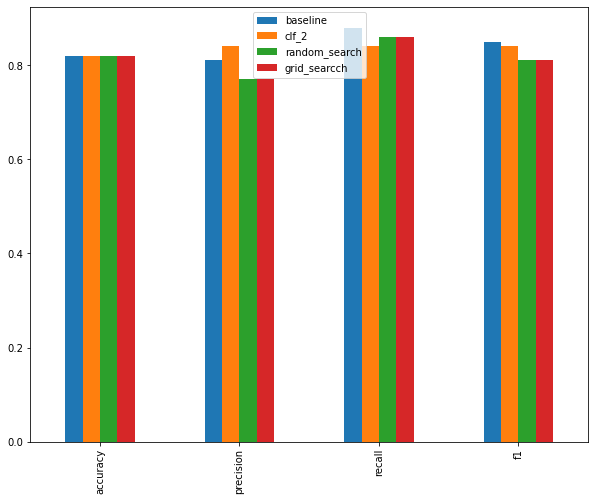

In [31]:
compare_metrics = pd.DataFrame({'baseline': baseline_metrics, 
                                'clf_2': clf_2_metrics, 
                                'random_search': rs_metrics,
                                'grid_searcch': gs_metrics})

compare_metrics.plot.bar(figsize=(10,8));